In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
raw_data = pd.read_csv('test_values.csv')
##setting building_id as the index for easy referencing
#raw_data = raw_data.set_index('building_id')
y_train = pd.read_csv('out.csv')
#y_train = y_train.set_index('building_id')
y_train.head()

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,3


In [3]:
geolevels = pd.DataFrame(raw_data[['building_id','geo_level_1_id']])
geolevels['damage_grade'] = y_train['damage_grade']
geolevels = geolevels.set_index('building_id')
geolevels.head()

,geo_level_1_id,damage_grade
building_id,,
300051,17,2
99355,6,2
890251,22,2
745817,26,2
421793,17,3


In [4]:
geolevelsdmg1 = geolevels.loc[geolevels['damage_grade'] == 1] 
geolevelsdmg2 = geolevels.loc[geolevels['damage_grade'] == 2] 
geolevelsdmg3 = geolevels.loc[geolevels['damage_grade'] == 3] 


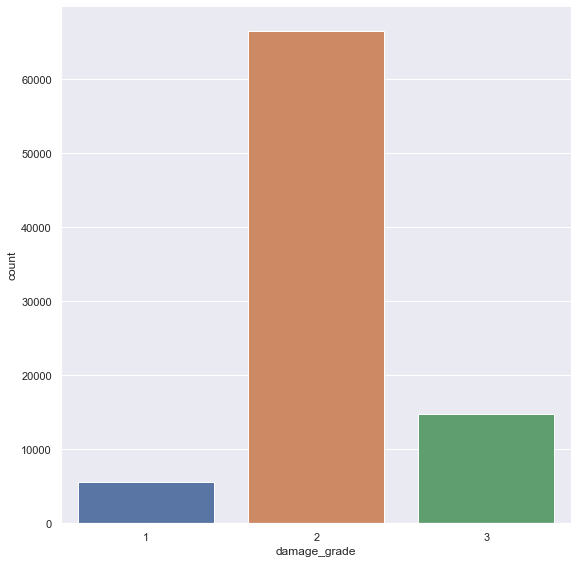

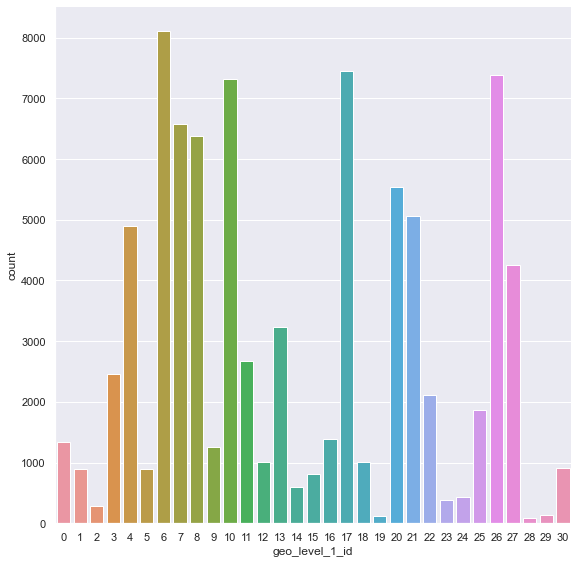

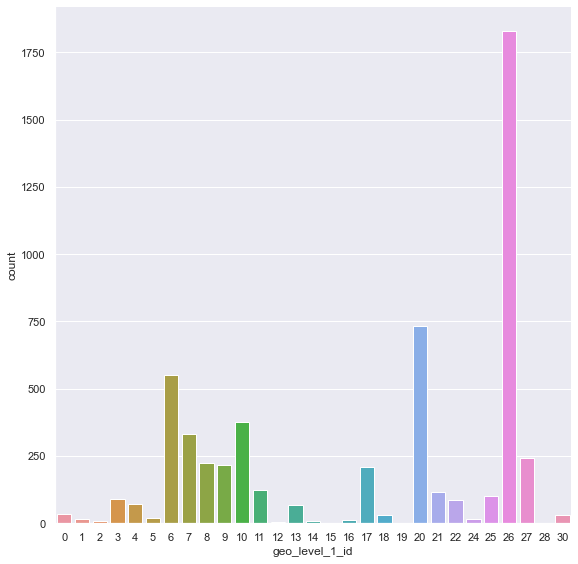

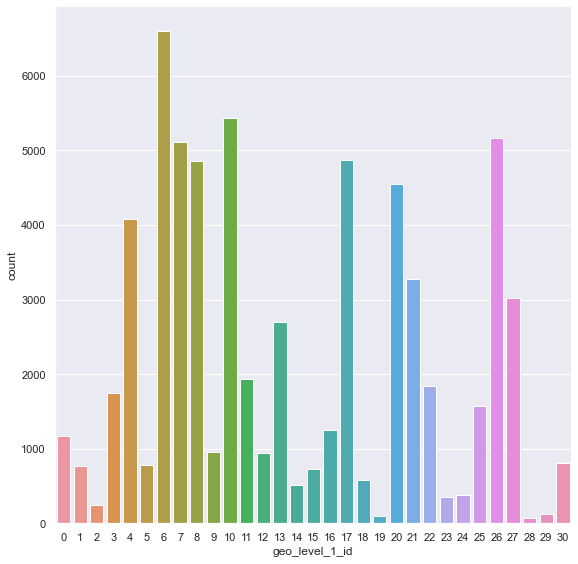

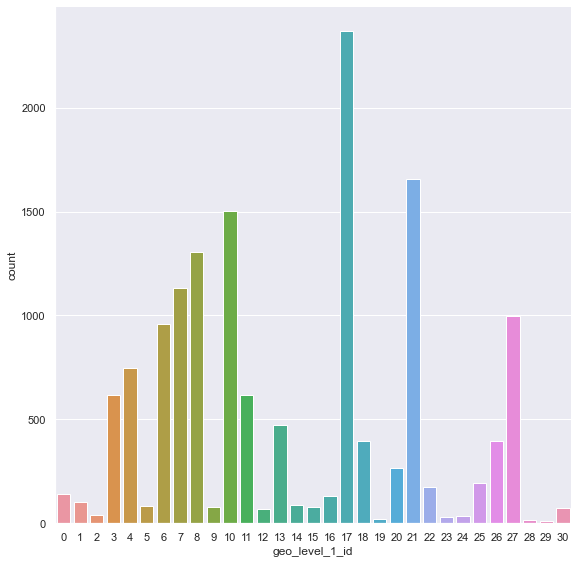

In [5]:
sb.catplot(x='damage_grade', data = geolevels, kind = "count", height = 8)
sb.catplot(x='geo_level_1_id', data = geolevels, kind = "count", height = 8)
sb.catplot(x='geo_level_1_id', data = geolevelsdmg1, kind = "count", height = 8)
sb.catplot(x='geo_level_1_id', data = geolevelsdmg2, kind = "count", height = 8)
sb.catplot(x='geo_level_1_id', data = geolevelsdmg3, kind = "count", height = 8)
#ax = sb.swarmplot(x="damage_grade", y="geo_level_1_id", data=geolevels)
#sb.swarmplot(x = 'damage_grade', y = 'geo_level_1_id', data = geolevels)

The above graphs show the frequency of damage grades in each location, and there can definetly be seen a distinct trend in each of the damage grades for the test data.
Firstly, the whole country was most affected with damage grade = 2, with it being the highest proportion amongst the three.
Then the highest occurences within the 
The first point that can be noticed is that the damage grade = 2 was the most occured out of all the other others, with levelid 6 having the most occurences at 6600. The level id that was hit the hardest was 17 with the highest number of occurences in damage grade = 3, and a fairly high occurence in damage grade = 2 but very less in damage grade = 1, showing that it was quite badly hit.
Location ID 6,7,8, 10, 21,26 and 27 were all significantly affected by damage grade = 3, with all the latter having high occurences in damage grade =2, and 26 having the largest occurence for damage grade = 1

In [6]:
cols = ['geo_level_1_id', 'Average_Damage_Grade']
lst = []
for count in range(31):
    geodist = geolevels.loc[geolevels['geo_level_1_id'] == count] 
    dmg = geodist['damage_grade'].mean()
    lst.append([count,dmg])   
avgdamages = pd.DataFrame(lst, columns=cols)
avgdamages.head()


    
#sb.distplot(houseNumData[var], color = colors[count], ax = axes[count,1])


,geo_level_1_id,Average_Damage_Grade
0,0,2.077951
1,1,2.100338
2,2,2.110345
3,3,2.215071
4,4,2.138537


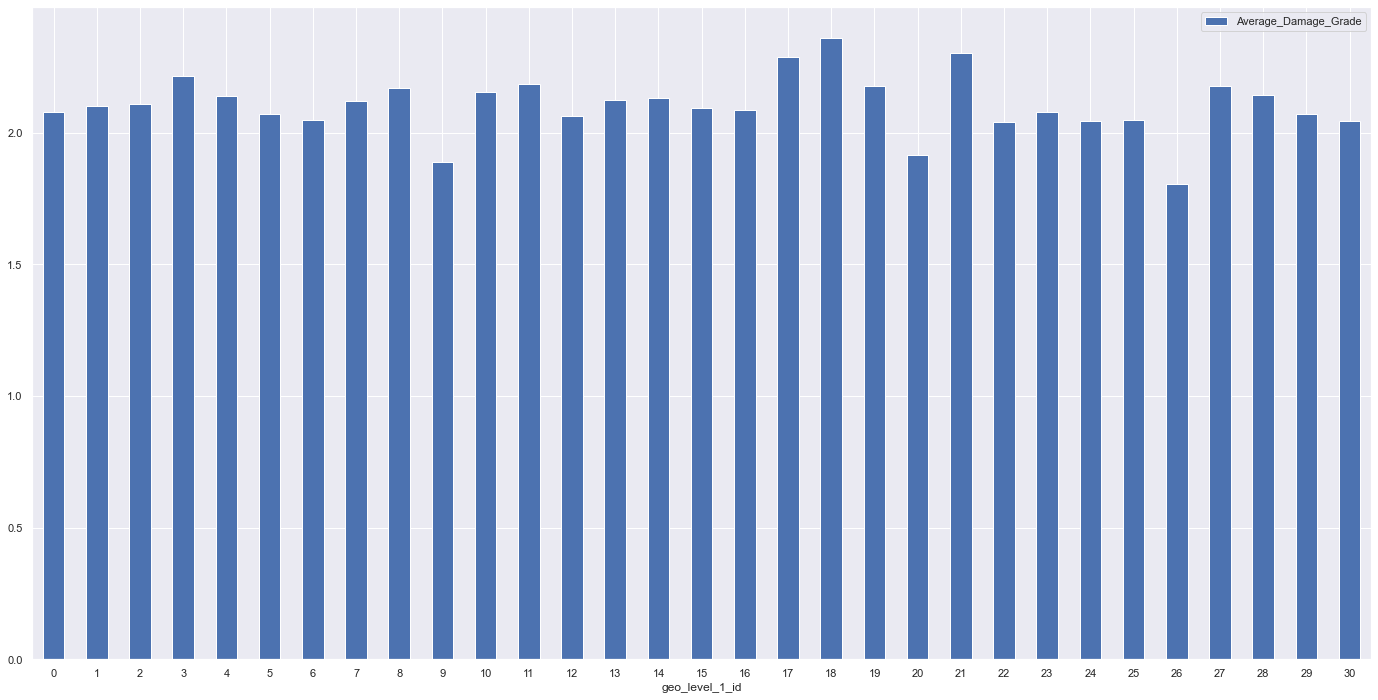

In [7]:
#sb.jointplot(df1['geo_level_1_id'], df1['Average_Damage_Grade'], height = 12)

ax = avgdamages.plot.bar(x='geo_level_1_id', y='Average_Damage_Grade', rot=0, figsize = (24,12))


The above graph shows the average damage grade in each location, and it correlates to the catplot before

In [8]:
industry = pd.DataFrame(raw_data[['building_id','has_secondary_use','has_secondary_use_agriculture','has_secondary_use_hotel',
                     'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school',
                    'has_secondary_use_industry', 'has_secondary_use_health_post','has_secondary_use_gov_office',
                    'has_secondary_use_use_police','has_secondary_use_other']])
industry['damage_grade'] = y_train['damage_grade']
industry = industry.set_index('building_id')
industry.head()

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,
300051,0,0,0,0,0,0,0,0,0,0,0,2
99355,1,1,0,0,0,0,0,0,0,0,0,2
890251,0,0,0,0,0,0,0,0,0,0,0,2
745817,1,0,0,1,0,0,0,0,0,0,0,2
421793,0,0,0,0,0,0,0,0,0,0,0,3


In [9]:
has_use =industry.loc[industry['has_secondary_use'] == 1] 
coldrop = ['has_secondary_use']
has_use = pd.DataFrame(has_use.drop(coldrop, axis=1))
has_use.head()

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,
99355,1,0,0,0,0,0,0,0,0,0,2
745817,0,0,1,0,0,0,0,0,0,0,2
535718,0,0,1,0,0,0,0,0,0,0,2
37201,1,0,0,0,0,0,0,0,0,0,2
304627,0,1,0,0,0,0,0,0,0,0,1


In [10]:
alst = []
for a in has_use:
    if a == 'damage_grade':
        break
    freq = has_use[a].sum()
    colls = ['IndustryName','Freq']
    alst.append([a,freq])
freqcount = pd.DataFrame (alst, columns=colls)
freqcount.head(50)



,IndustryName,Freq
0,has_secondary_use_agriculture,5568
1,has_secondary_use_hotel,2942
2,has_secondary_use_rental,716
3,has_secondary_use_institution,88
4,has_secondary_use_school,32
5,has_secondary_use_industry,87
6,has_secondary_use_health_post,9
7,has_secondary_use_gov_office,10
8,has_secondary_use_use_police,4
9,has_secondary_use_other,426


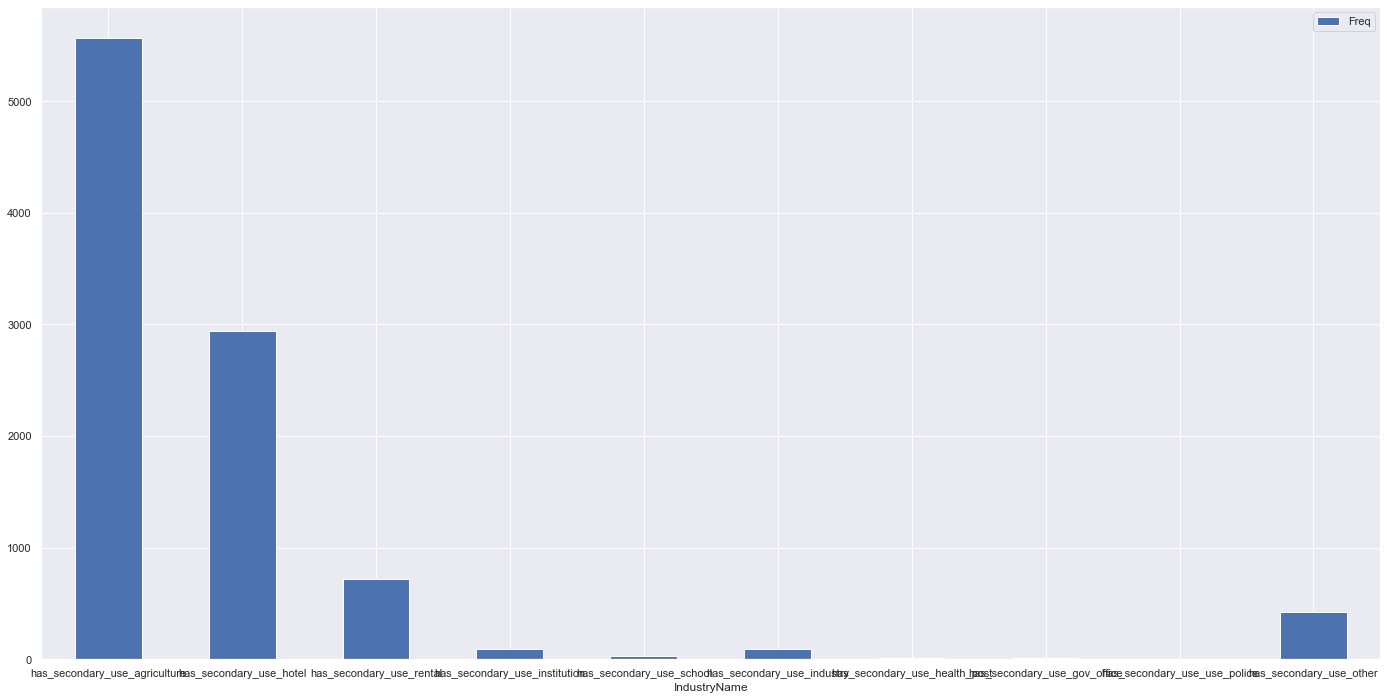

In [11]:
ax = freqcount.plot.bar(x='IndustryName', y='Freq', rot=0, figsize = (24,12))
#BELOW SHOWS TOTAL COUNT OF EACH INDUSTRY

In [14]:
industry_grade_1={'agriculture': 0,
                'hotel' :0,
                'rental':0,
                'institution' : 0,
                'school' : 0,
                'industry' :0, 
                'health_post': 0,
                'gov_office': 0,
                'police': 0,
               'other_uses' :0}

industry_grade_2={'agriculture': 0,
                'hotel' :0,
                'rental':0,
                'institution' : 0,
                'school' : 0,
                'industry' :0, 
                'health_post': 0,
                'gov_office': 0,
                'police': 0,
               'other_uses' :0}

industry_grade_3={'agriculture': 0,
                'hotel' :0,
                'rental':0,
                'institution' : 0,
                'school' : 0,
                'industry' :0, 
                'health_post': 0,
                'gov_office': 0,
                'police': 0,
               'other_uses' :0}
industry_list = ['has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution',
                'has_secondary_use_school', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 
                'has_secondary_use_use_police', 'has_secondary_use_other']

def industrial_checker(dictionary_grade,dataframe):
    count = 0 
    for i in range(len(dataframe)):
        for industry in industry_list:
            if dataframe[industry].iloc[i] == 1:
                if industry == 'has_secondary_use_agriculture':
                    dictionary_grade['agriculture'] += 1
                elif industry == 'has_secondary_use_hotel':
                    dictionary_grade['hotel'] += 1
                elif industry == 'has_secondary_use_rental':
                    dictionary_grade['rental'] += 1
                elif industry == 'has_secondary_use_institution' :
                    dictionary_grade['institution'] += 1
                elif industry == 'has_secondary_use_school':
                    dictionary_grade['school'] += 1
                elif industry == 'has_secondary_use_health_post':
                    dictionary_grade['health_post'] += 1
                elif industry == 'has_secondary_use_gov_office':
                    dictionary_grade['gov_office'] += 1
                elif industry == 'has_secondary_use_use_police':
                    dictionary_grade['police'] += 1
                else:
                    dictionary_grade['other_uses'] += 1
        count += 1
#has_use_1.head()
#print(has_use_1['has_secondary_use_agriculture'].iloc[0])
has_use_1 = pd.DataFrame(has_use[has_use['damage_grade'] == 1])
has_use_2 = pd.DataFrame(has_use[has_use['damage_grade'] == 2])
has_use_3 = pd.DataFrame(has_use[has_use['damage_grade'] == 3])
industrial_checker(industry_grade_1,has_use_1)
industrial_checker(industry_grade_2,has_use_2)
industrial_checker(industry_grade_3,has_use_3)

dict_list = [industry_grade_1,industry_grade_2,industry_grade_3]
counter= 1

for dictonary_call_out in dict_list:
    print('The Sectors being hit with damage {}'.format(counter))
    print(dictonary_call_out, '\n')
    counter += 1
               

The Sectors being hit with damage 1
{'agriculture': 138, 'hotel': 756, 'rental': 288, 'institution': 41, 'school': 11, 'industry': 0, 'health_post': 3, 'gov_office': 6, 'police': 1, 'other_uses': 35} 

The Sectors being hit with damage 2
{'agriculture': 4389, 'hotel': 1850, 'rental': 377, 'institution': 38, 'school': 18, 'industry': 0, 'health_post': 6, 'gov_office': 4, 'police': 1, 'other_uses': 318} 

The Sectors being hit with damage 3
{'agriculture': 1041, 'hotel': 336, 'rental': 51, 'institution': 9, 'school': 3, 'industry': 0, 'health_post': 0, 'gov_office': 0, 'police': 2, 'other_uses': 73} 



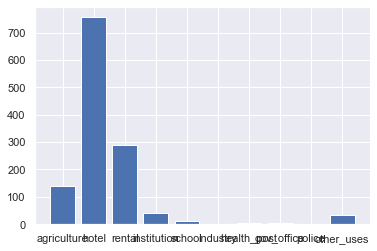

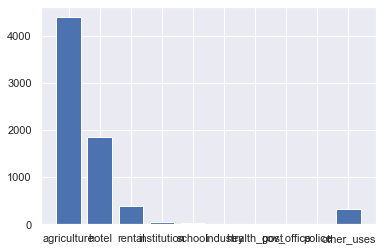

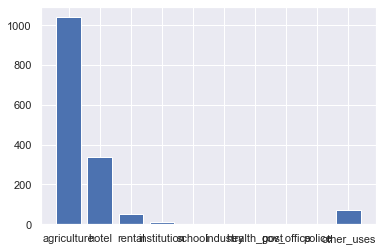

In [19]:
for dictonary_call_out in dict_list:
    plt.bar(*zip(*dictonary_call_out.items()))
    plt.show()

In [12]:
lst = []
for x in has_use:
    if x == 'damage_grade':
        break
    boolean = has_use.loc[has_use[x] == 1] 
    dmg = boolean['damage_grade'].mean()
    cols = ['Industry_Name', 'Average_Damage_Grade']
    lst.append([x,dmg]) 
avgdamages = pd.DataFrame(lst, columns=cols)
avgdamages.head() 

        
        


,Industry_Name,Average_Damage_Grade
0,has_secondary_use_agriculture,2.162177
1,has_secondary_use_hotel,1.857240
2,has_secondary_use_rental,1.668994
3,has_secondary_use_institution,1.636364
4,has_secondary_use_school,1.750000


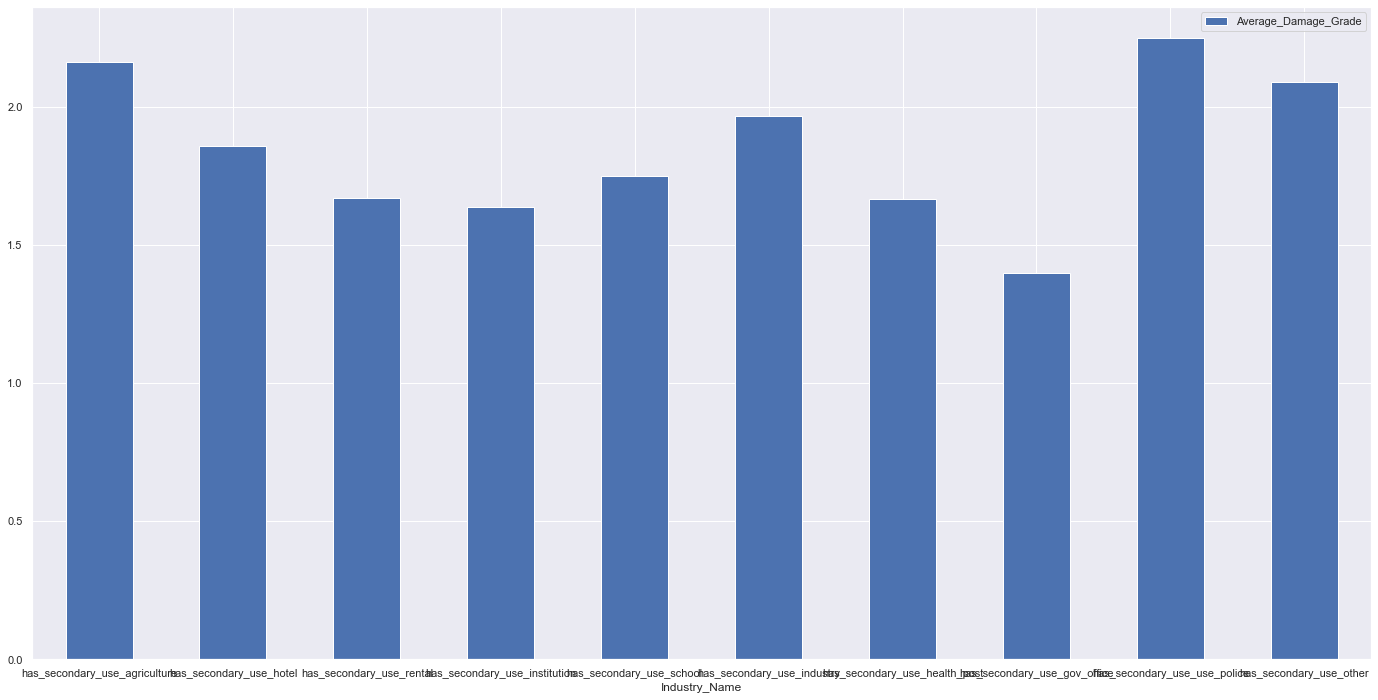

In [13]:
ax = avgdamages.plot.bar(x='Industry_Name', y='Average_Damage_Grade', rot=0, figsize = (24,12))
        
